# SOM

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('../../scripts')
from selfsom import SimpleSOMMapper
import somtools
from TransitSOM_release import CreateSOM
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

---

## Stacking .npz files

In [2]:
def stack_npz_files(directory):
    files = os.listdir(directory)
    npz_files = [f for f in files if f.endswith('.npz')]
    if not npz_files:
        print("No .npz files found in the directory.")
        return None

    arrays = []
    ids = []
    for npz_file in npz_files:
        file_path = os.path.join(directory, npz_file)
        data = np.load(file_path)
        array = data['flux']  # Assuming the array in each .npz file is named 'arr_0'
        obj_id = data['id']
        if len(array) == 241:
            arrays.append(array)
            ids.append(obj_id.item())

    stacked_array = np.vstack(arrays)
    stacked_ids = ids

    # Create a dictionary to map arrays to IDs
    id_map = {tuple(array): id for array, id in zip(arrays, stacked_ids)}

    return stacked_array, stacked_ids, id_map

In [3]:
som_array, ids, id_map = stack_npz_files('../som_cutouts/')

## Train SOM

In [4]:
# kshape = (15,15)
# niter  = 1000

# SOM = SimpleSOMMapper(kshape, niter)

# print('som is training')

# SOM.train(som_array)

# print('training ended')

# K = SOM.K


In [5]:
trained_data = CreateSOM(som_array,somshape=(10,10),niter=1000)

## map the data onto a pixel
mapped = trained_data(som_array)
mapped_tuples = [tuple(point) for point in mapped]
## count how many are in that pixel
counts = Counter(mapped_tuples)
count_list = [counts[item] for item in mapped_tuples]

In [6]:
# arrays_at_pixel = {}
# for item in mapped_tuples:
#     if item not in arrays_at_pixel:
#         arrays_at_pixel[item] = []
#     arrays_at_pixel[item].append(som_array[mapped_tuples.index(item)])

# # Access the arrays at specific pixel location
# pixel_location = (0, 0)  # Specify the pixel location you want to retrieve the arrays from
# arrays = np.array(arrays_at_pixel.get(pixel_location, []))

In [7]:
trained_data

SimpleSOMMapper(kshape=(10, 10), niter=1000, learning_rate=0.100000, iradius=10.000000)

---
## Plot Kohonen layers

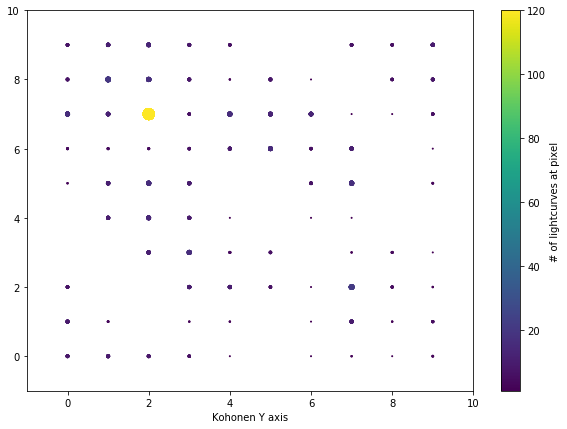

In [8]:
x_pos = mapped[:,0]
y_pos = mapped[:,1]
count_list = [counts[item] for item in mapped_tuples]
plt.figure(figsize=(10,7))
plt.xlim([-1,10])
plt.ylim([-1,10])
plt.xlabel('Kohonen X axis')
plt.xlabel('Kohonen Y axis')
plt.scatter(x_pos,y_pos,c=count_list,s=count_list)
plt.colorbar(label='# of lightcurves at pixel')
plt.savefig('kohonen_layers.png')
plt.show()

### Plot average lightcurve in each pixel

In [9]:
def quick_K_pixel_plot_revisited(som,x_pixel,y_pixel,bins=np.arange(241),save=False):
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(bins, som[x_pixel,y_pixel],c='g')
#    ax.set_title('Kohonen pixel at [{},{}]'.format(x_pixel,y_pixel))
    #plt.ylim([0,1])
    #plt.xlim([-2,66])
    #plt.text(0,0.92,'[{},{}]'.format(x_pixel,y_pixel))

In [10]:
array = trained_data.K

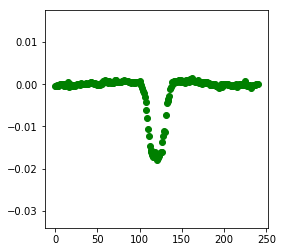

In [11]:
quick_K_pixel_plot_revisited(array,0,1)

In [12]:
def plot_all_arrays(som, bins=np.arange(241), save=True):
    fig, axes = plt.subplots(10, 10, figsize=(50, 50))
    #fig.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust the width and height spacing between subplots

    for x_pixel in range(10):
        for y_pixel in range(10):
            ax = axes[x_pixel, y_pixel]
            ax.scatter(bins, som[x_pixel, y_pixel], c='g',s=3)
            ax.set_title('Kohonen pixel at [{},{}]'.format(x_pixel, y_pixel))
            #ax.text(0, 0.92, '[{},{}]'.format(x_pixel, y_pixel))
    
    if save:
        plt.savefig('s6.png',dpi=200)  # Save the figure if save is True
    
    plt.show()

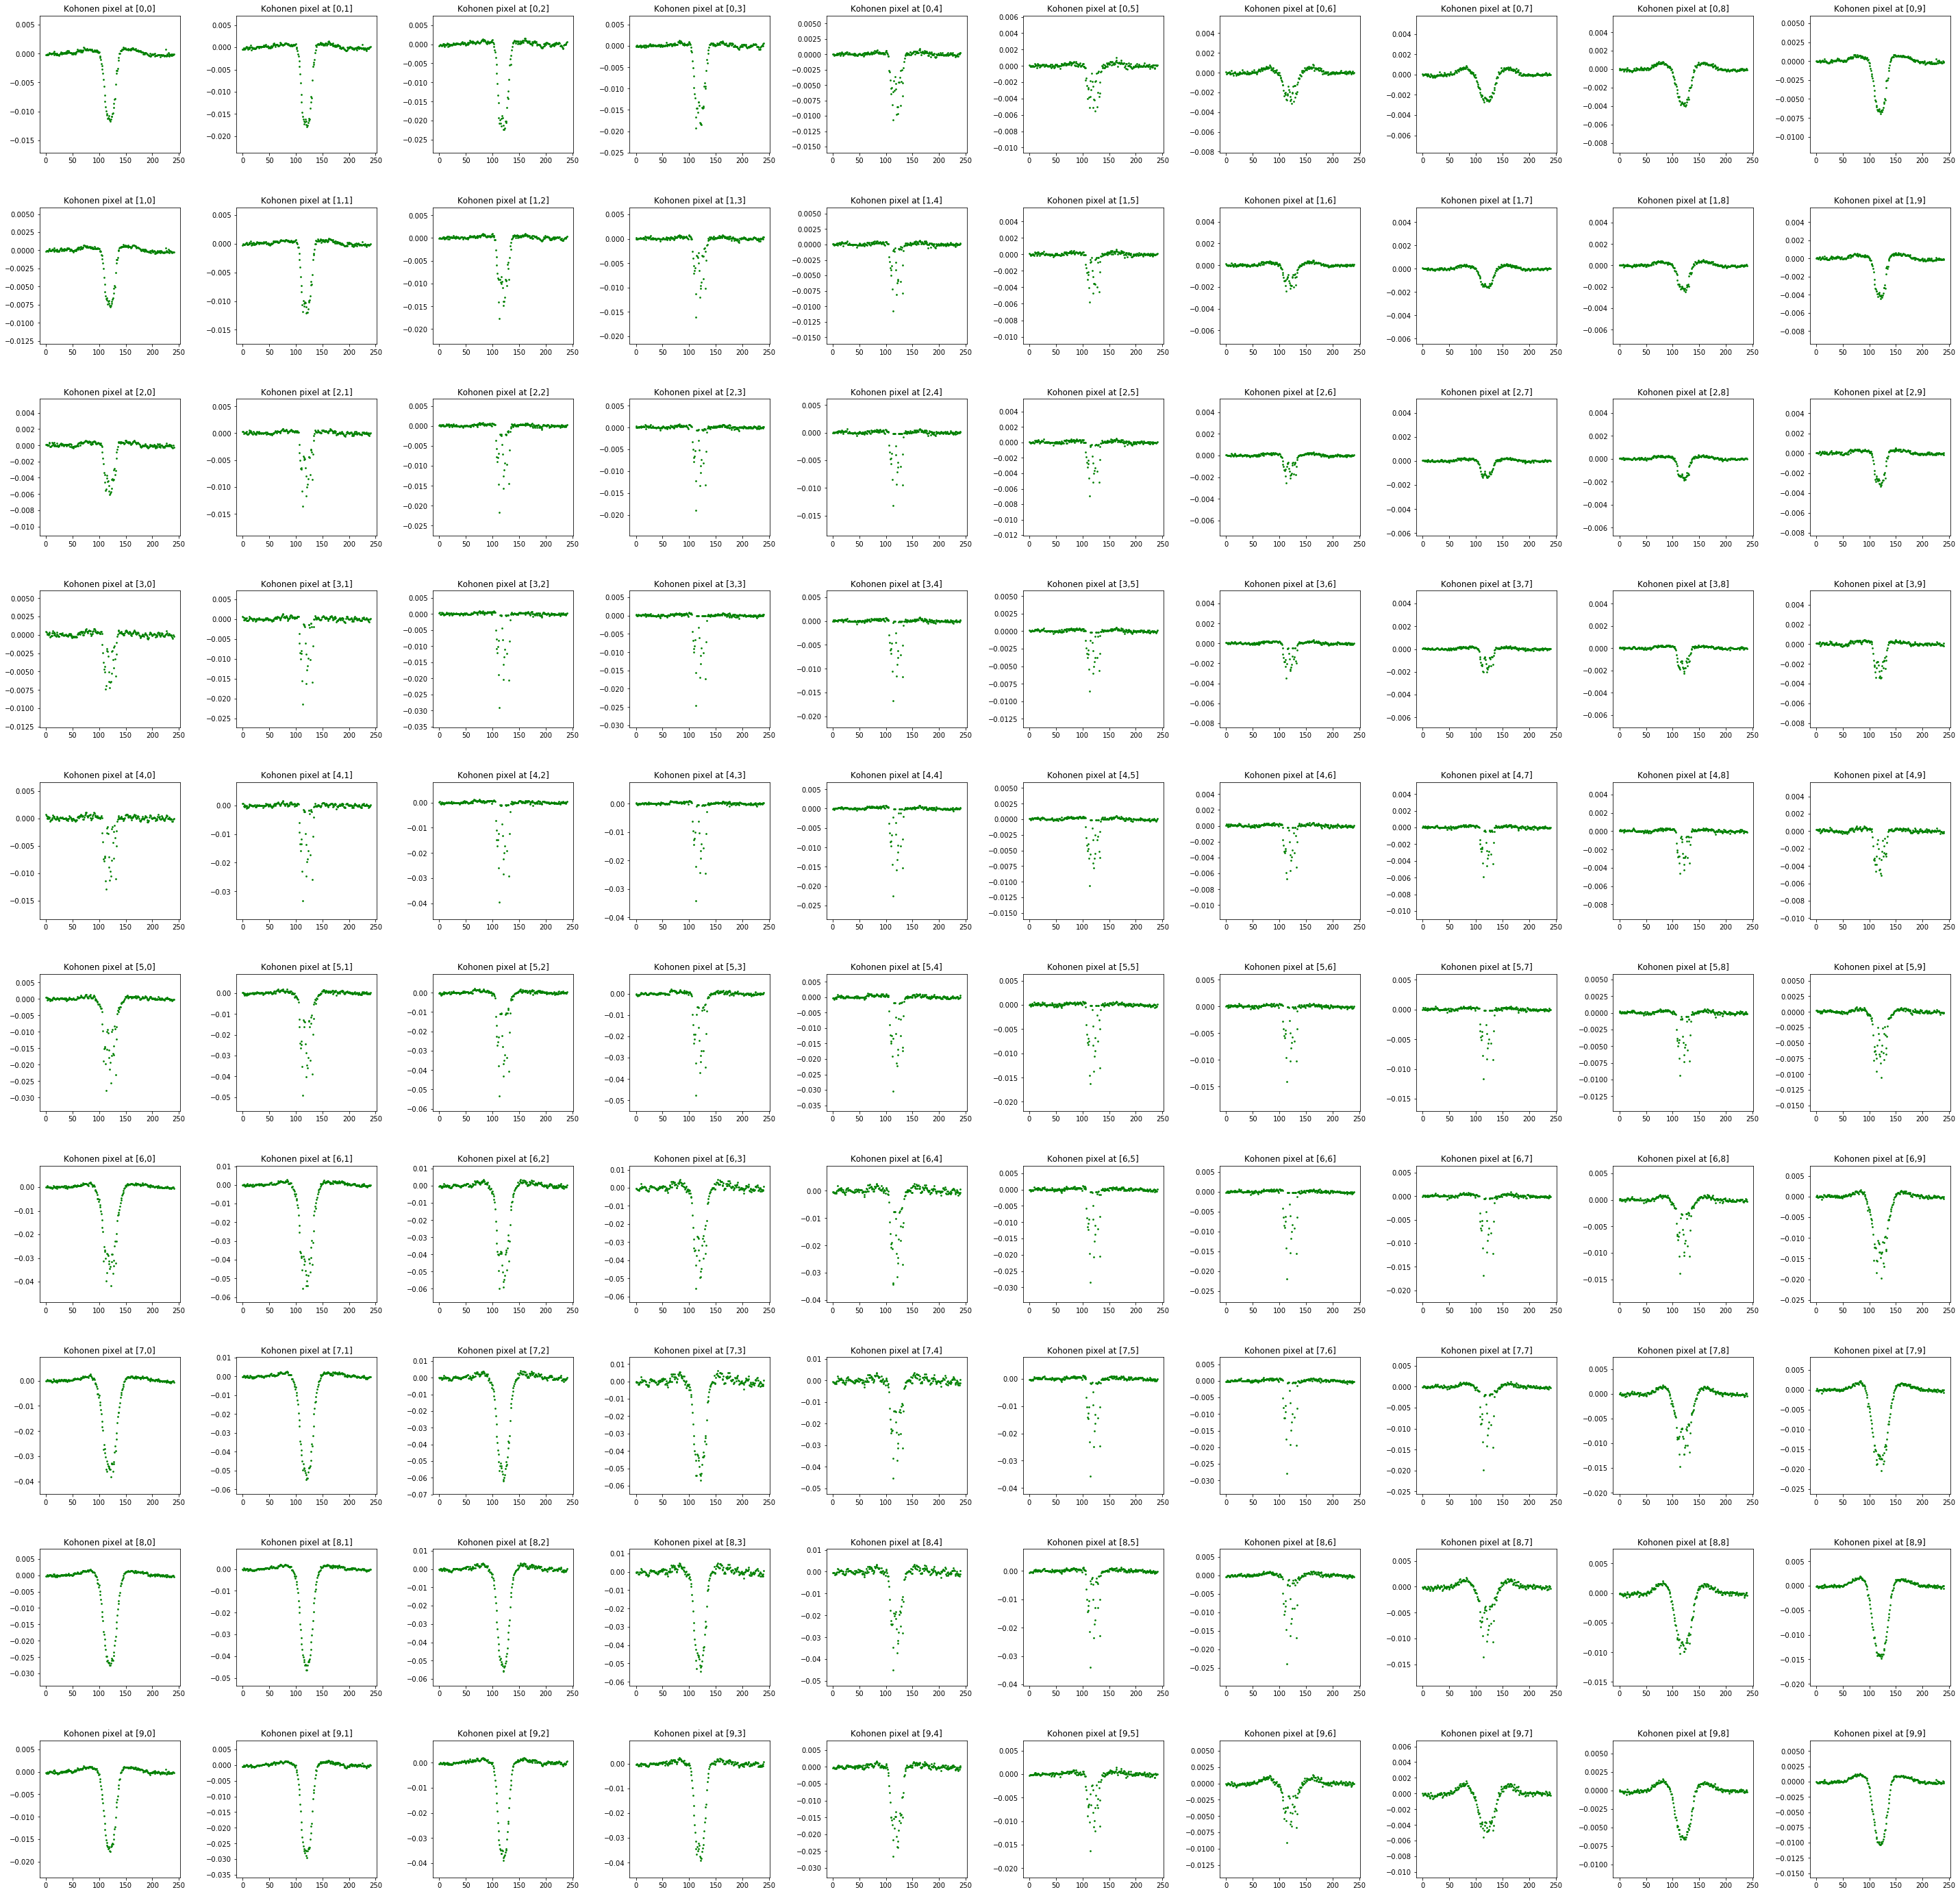

In [13]:
plot_all_arrays(array)

Transpose this

---
### What lightcurve ID's are underneath each pixel?

---

In [14]:
os.chdir('../')

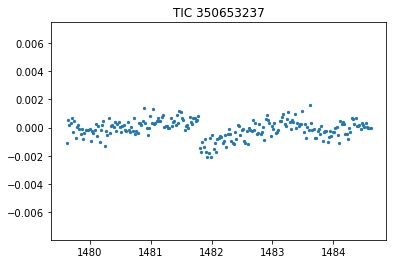

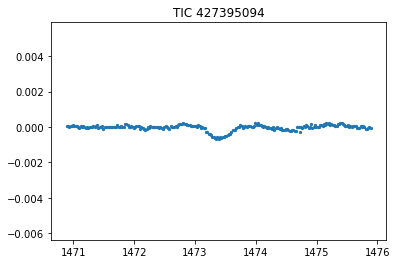

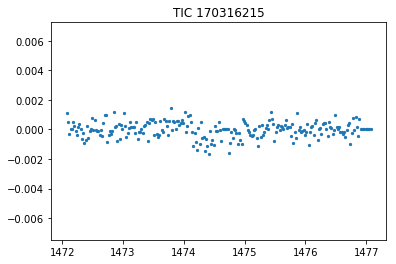

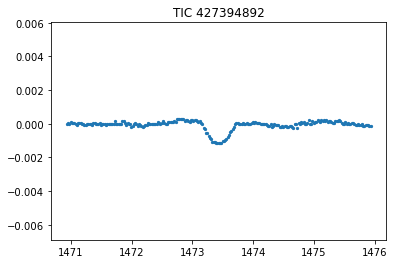

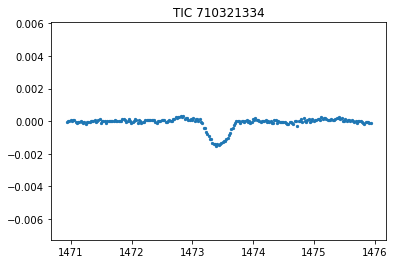

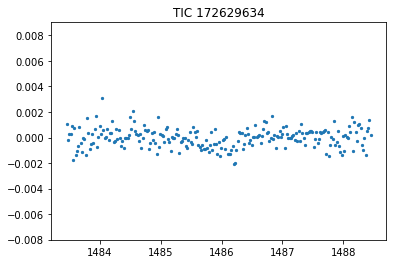

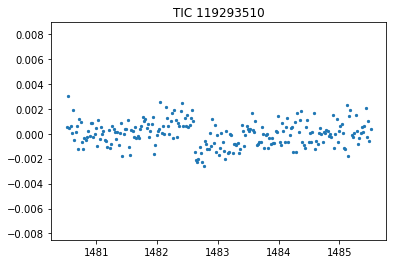

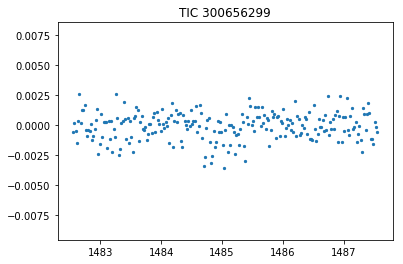

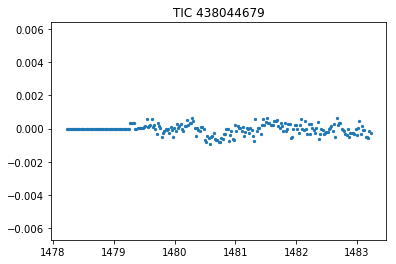

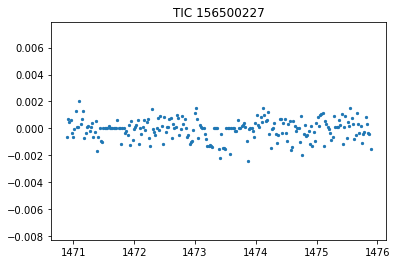

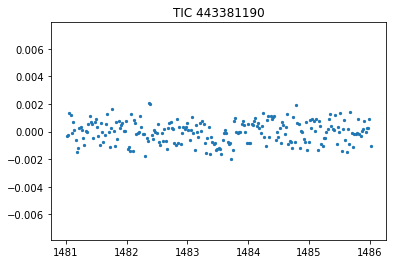

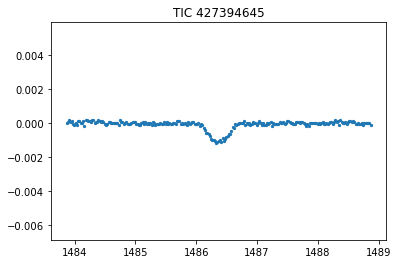

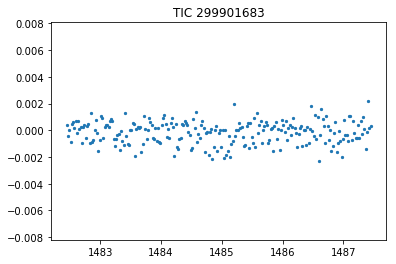

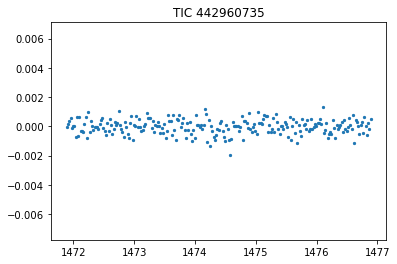

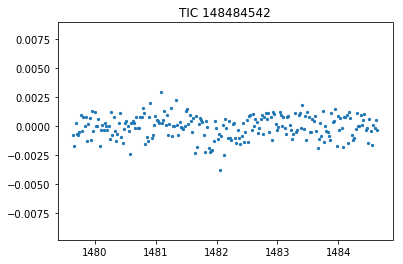

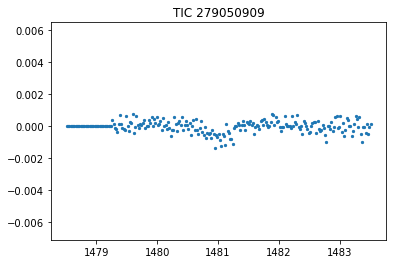

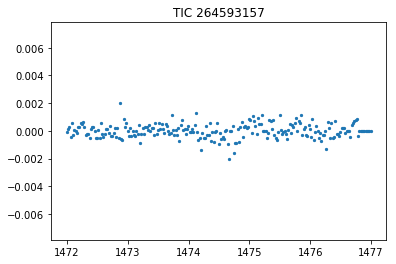

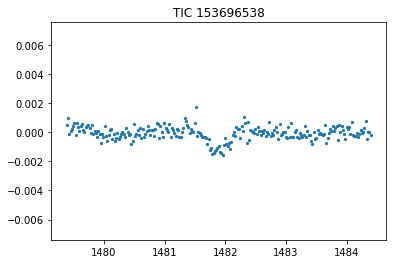

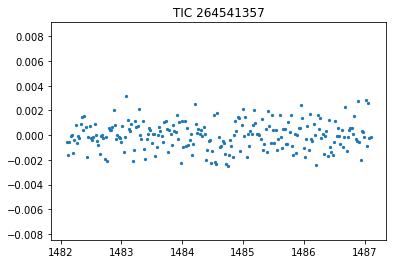

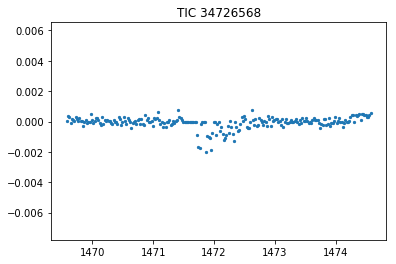

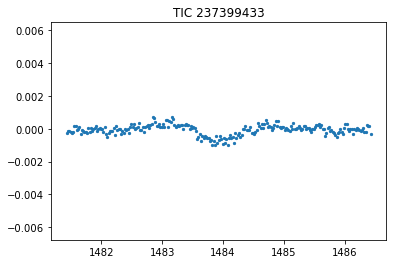

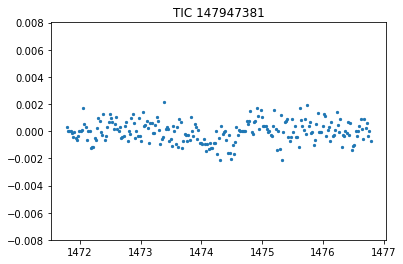

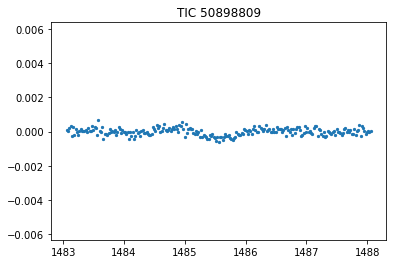

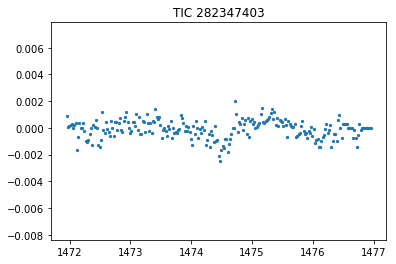

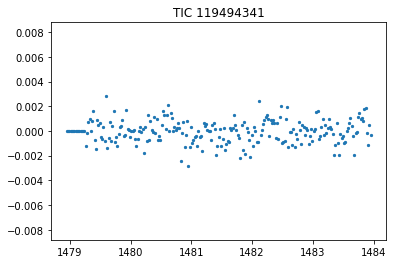

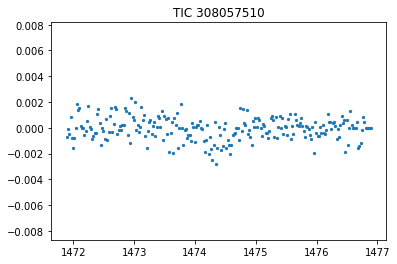

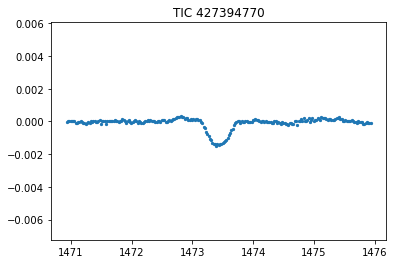

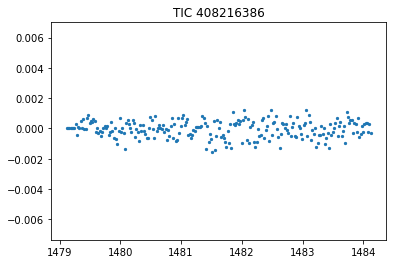

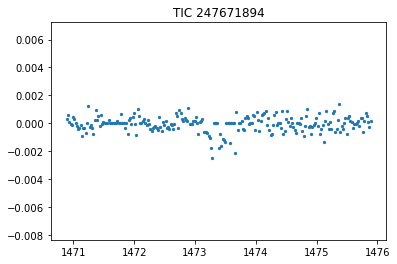

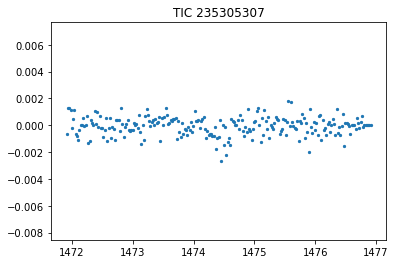

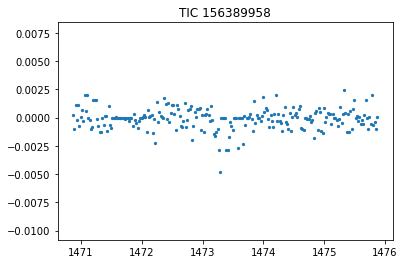

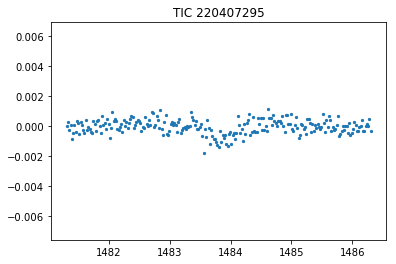

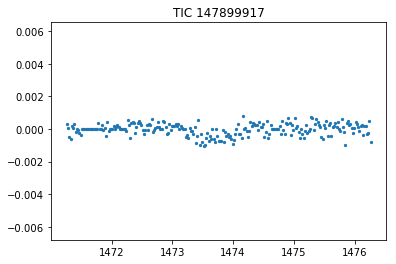

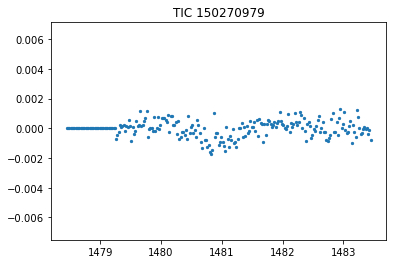

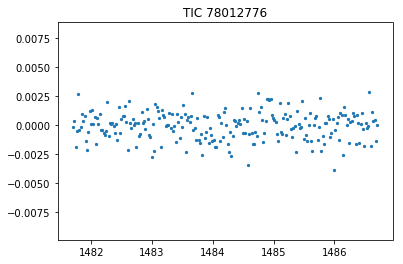

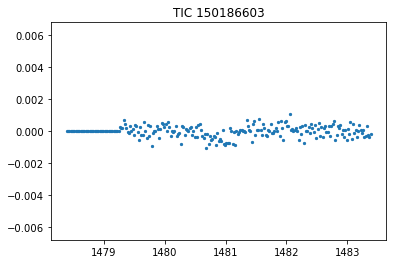

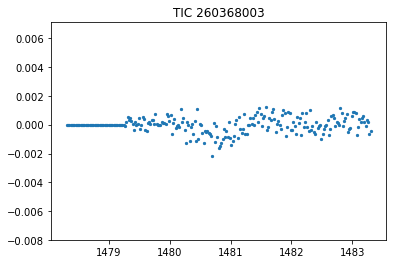

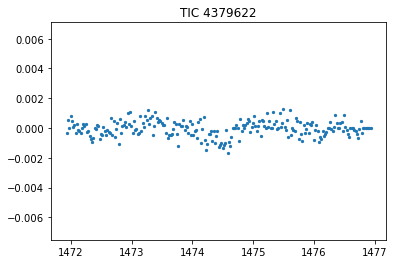

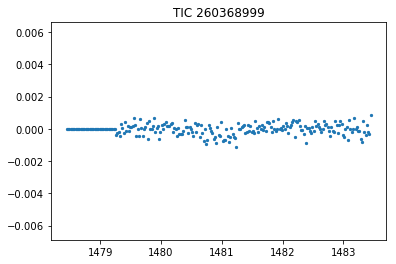

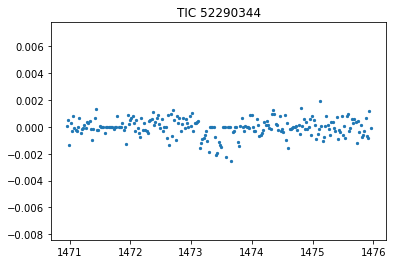

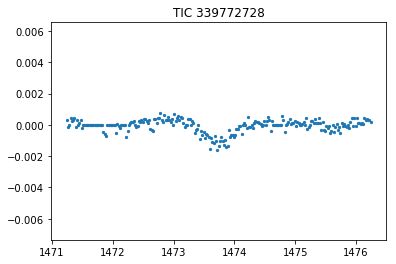

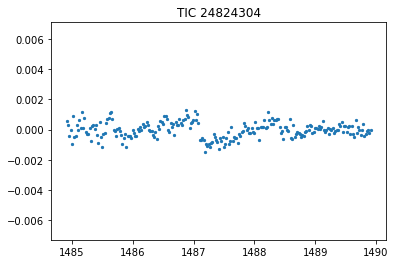

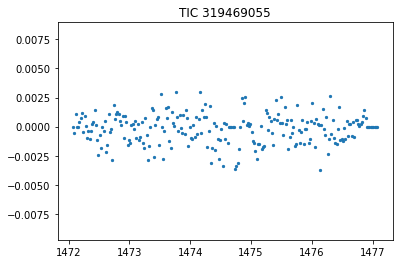

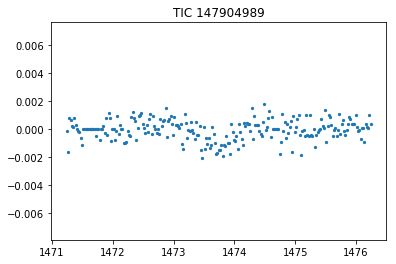

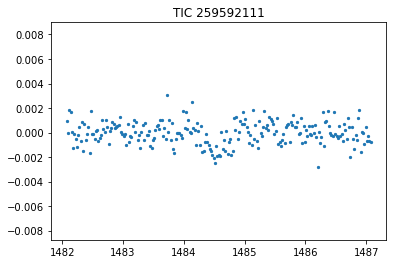

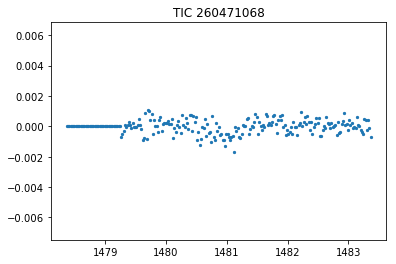

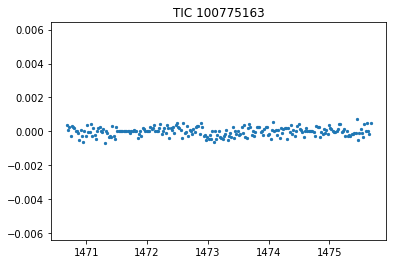

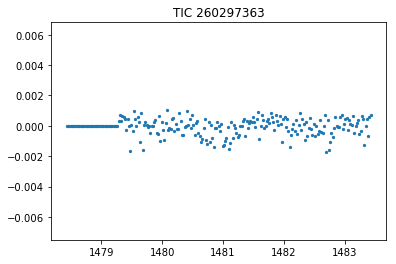

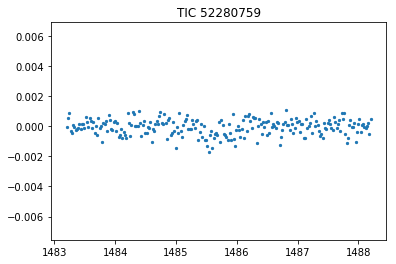

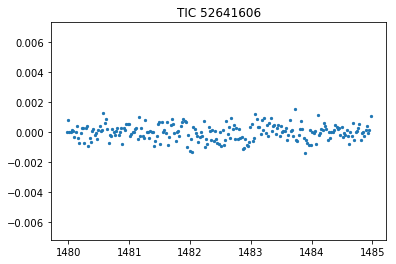

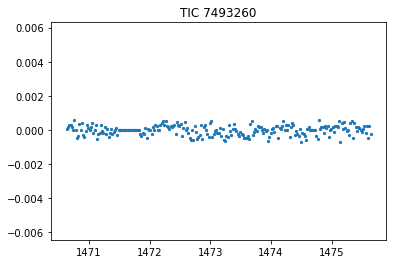

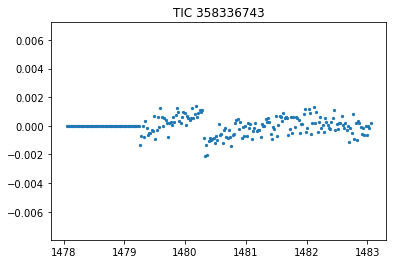

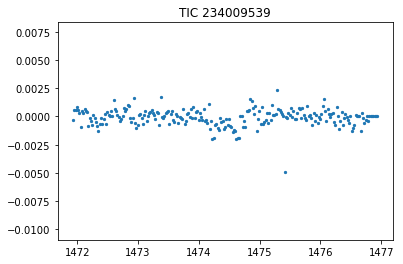

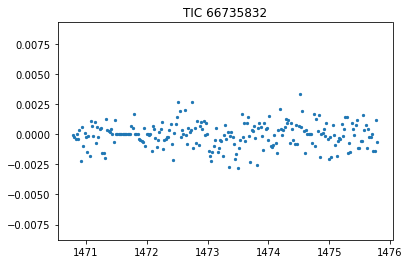

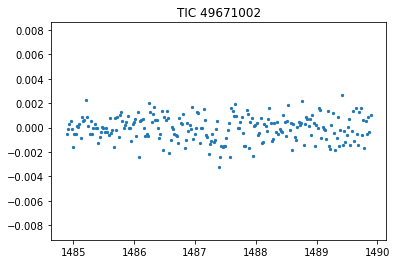

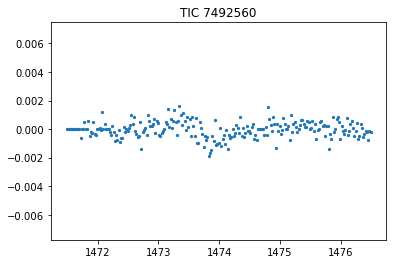

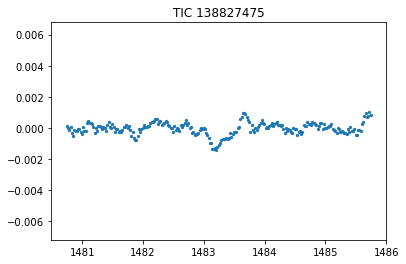

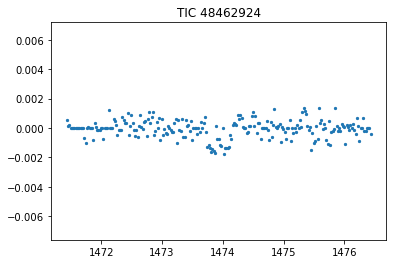

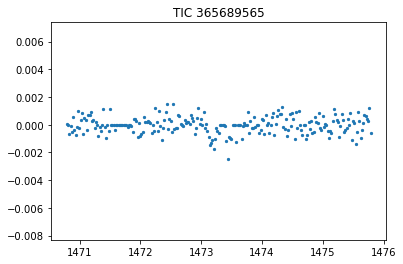

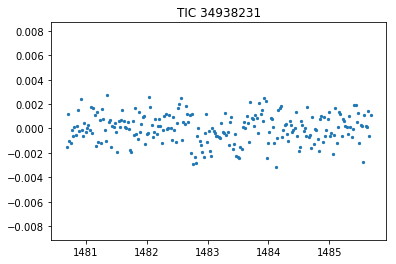

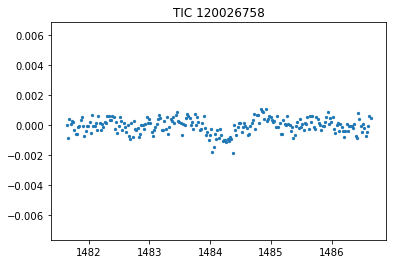

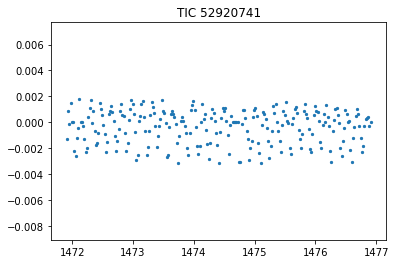

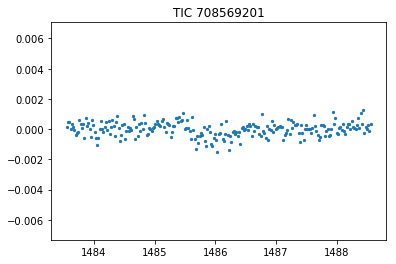

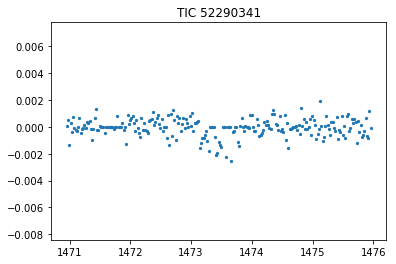

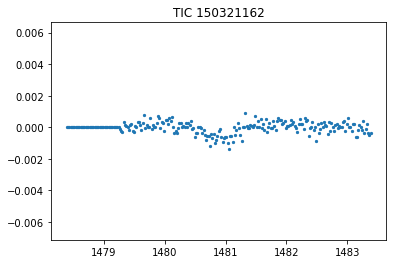

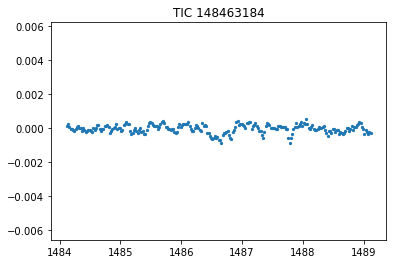

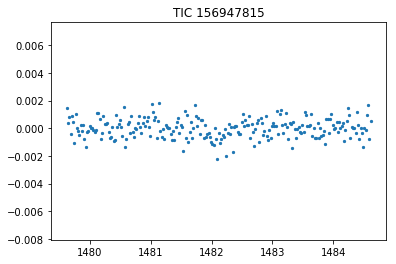

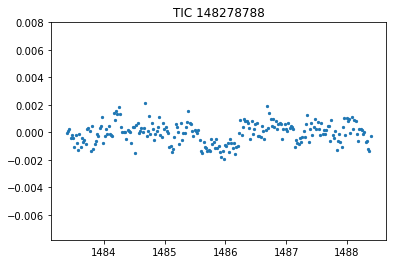

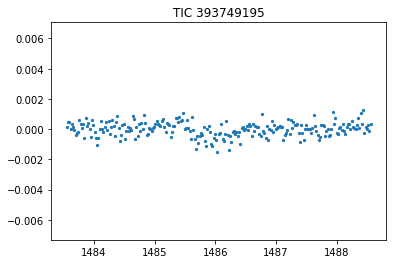

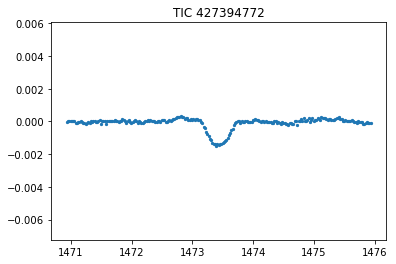

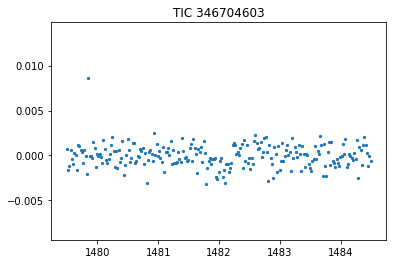

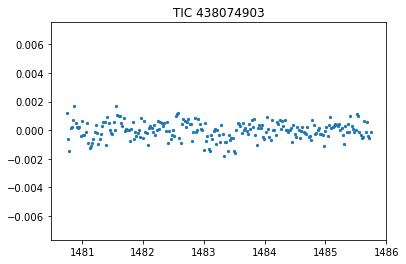

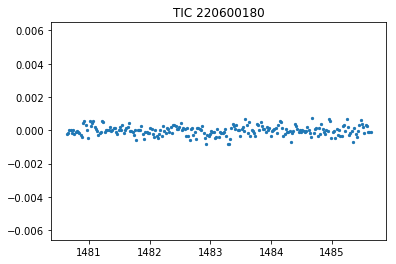

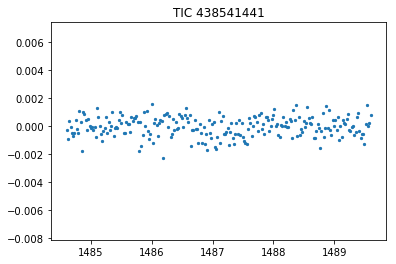

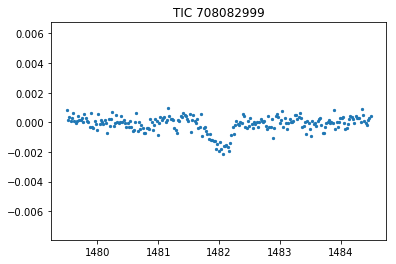

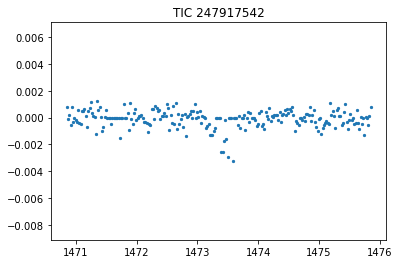

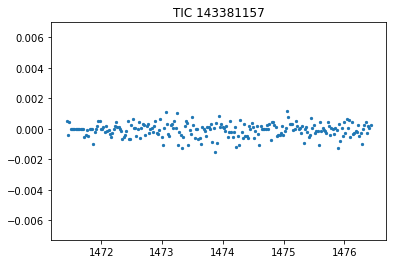

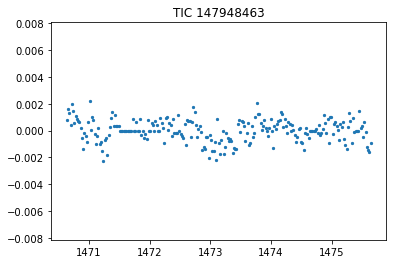

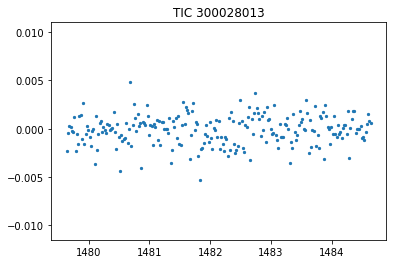

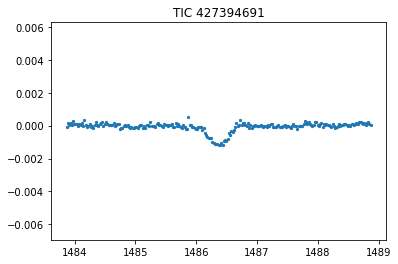

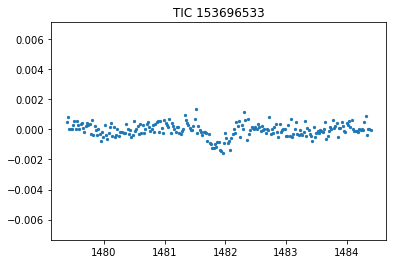

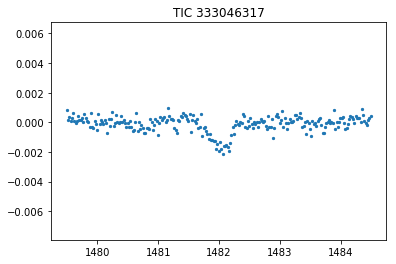

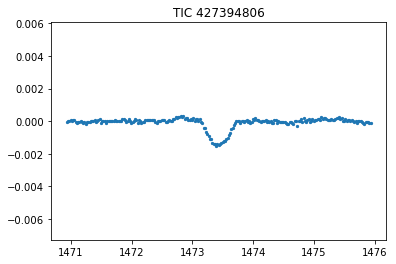

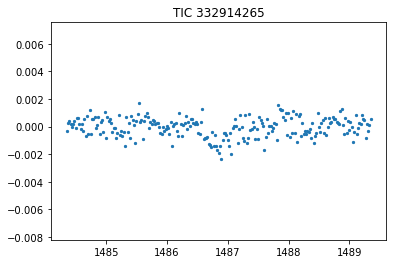

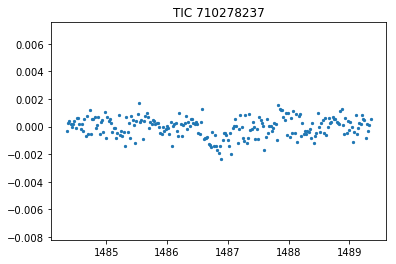

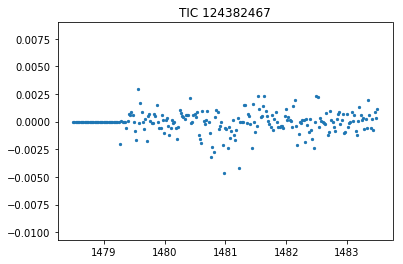

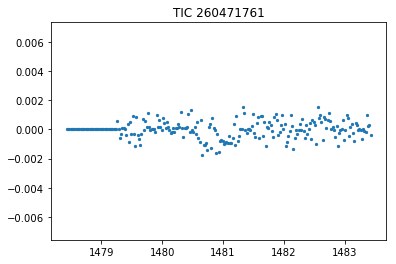

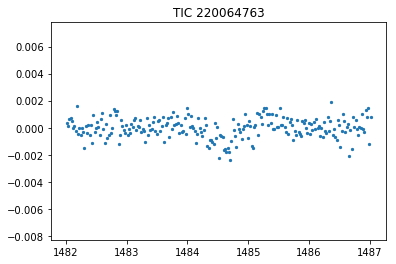

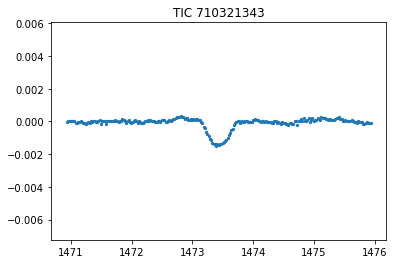

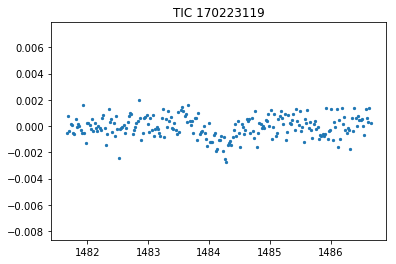

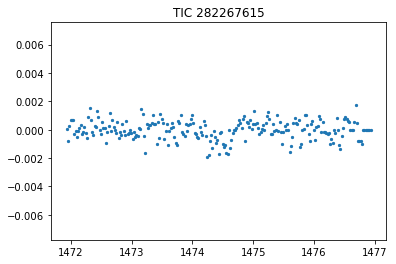

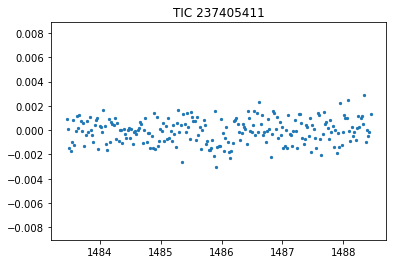

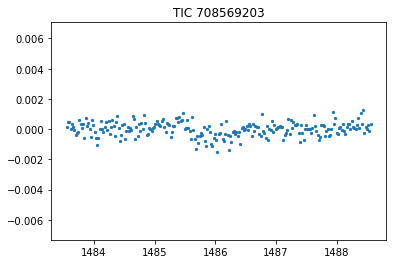

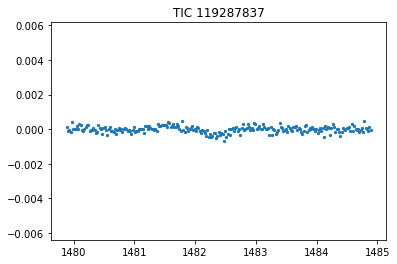

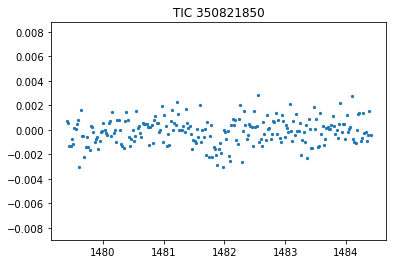

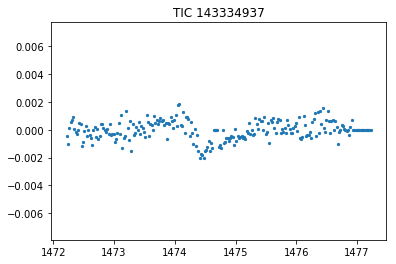

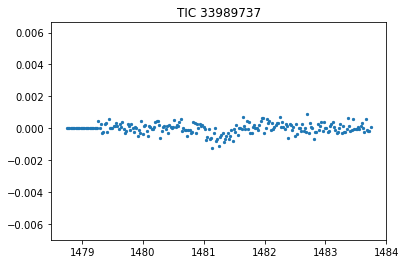

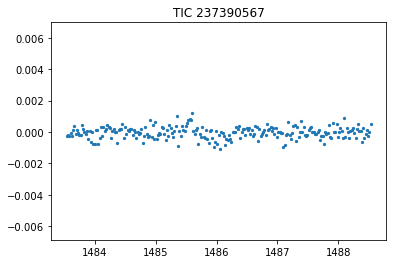

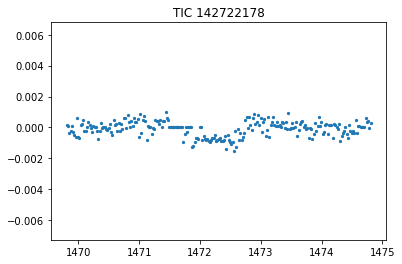

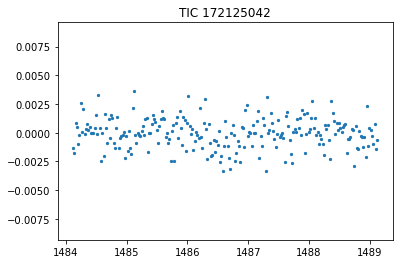

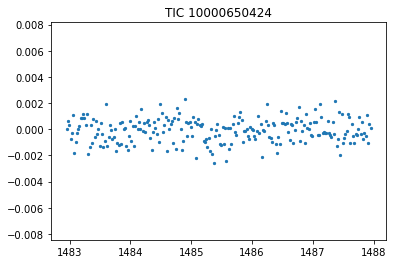

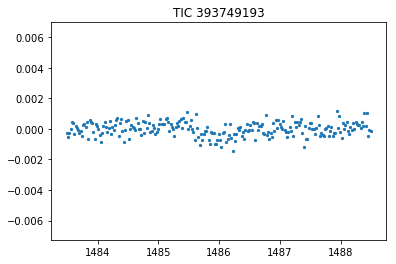

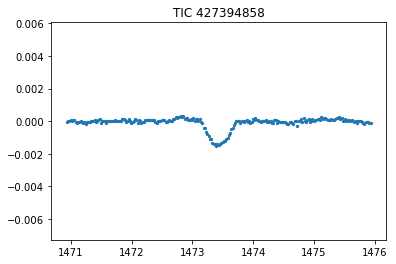

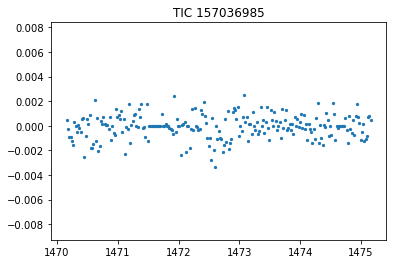

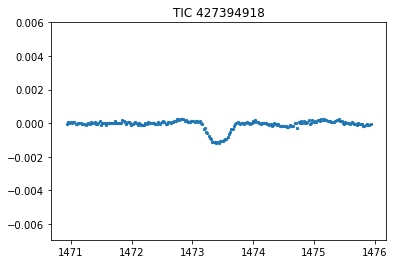

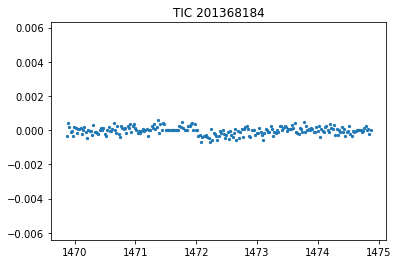

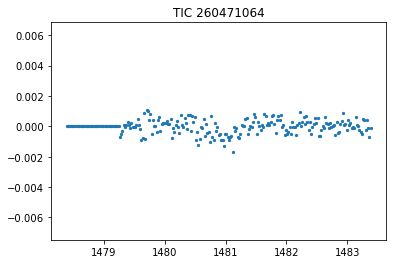

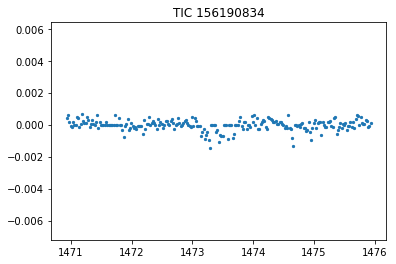

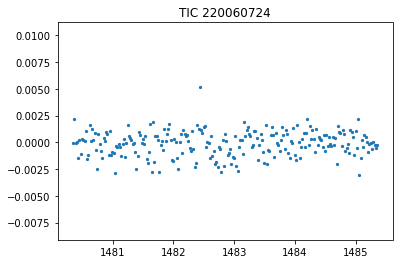

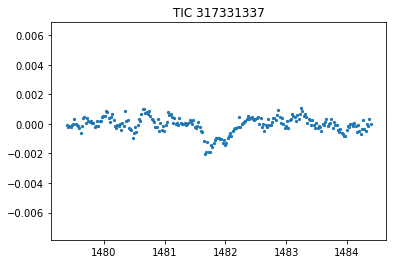

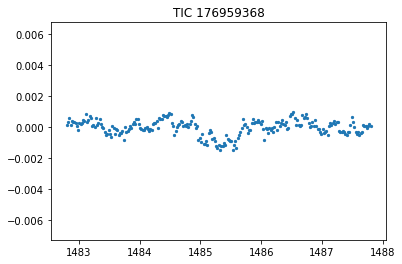

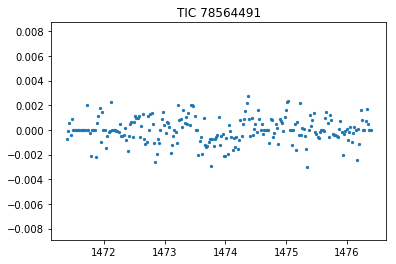

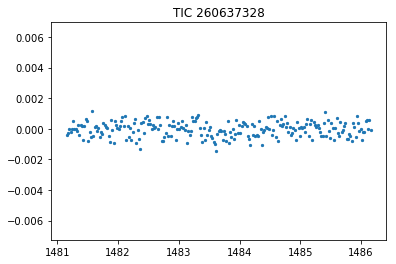

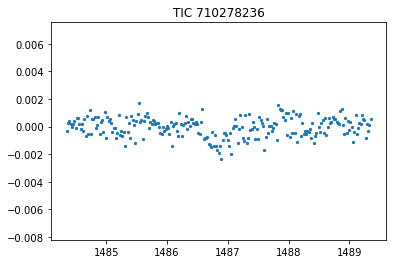

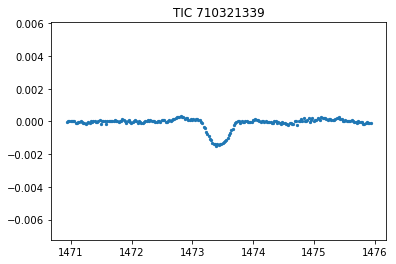

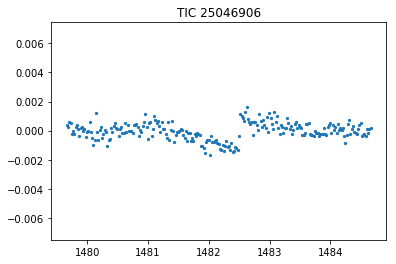

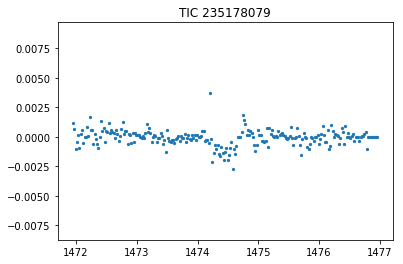

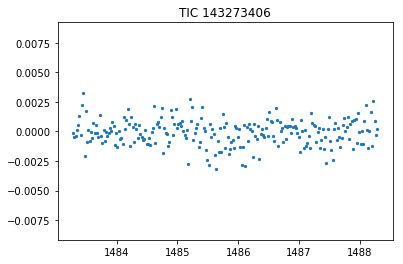

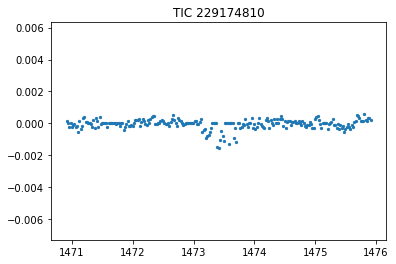

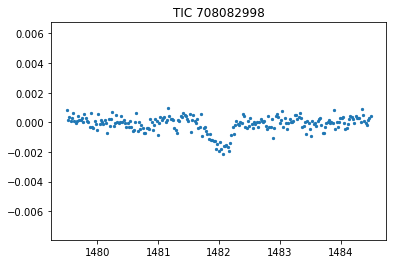

In [17]:
def get_lightcurves(ids,mapped_tuples,pixel, directory):
    """
    This function retrieves lightcurves in the SOM pixels. 
    
    :ids: TIC IDs from `stack_npz_files`
    :mapped_tuples: Obtained from the SOM process, where this is the coordinates of the lightcurve
    :pixel: desired pixel to retrieve lightcurves
    :dir: Directory of where original `.npz` files are.
    
    outputs:
        lightcurve plots.
    
    pixel has to be in the form of (x,y) coordinates"""
    df = pd.DataFrame(data=[ids,mapped_tuples]).T
    df.columns = ['TIC','coords']
    lightcurves = df.groupby('coords').get_group(pixel).reset_index(drop=True)
    for i in lightcurves.TIC:
        #file_pattern = os.path.join(directory, '**', f'*{number_}*')
        lc = np.load("som_cutouts/{}.npz".format(i))
        plt.title("TIC {}".format(i))
        plt.scatter(lc['time'],lc['flux'],s=5)
        plt.show()
get_lightcurves(ids,mapped_tuples,(2,7),'som_cutouts/')

In [ ]:
df = pd.DataFrame(data=[ids,mapped_tuples]).T
df.columns = ['TIC','coords']
test = df.groupby('coords').get_group((0,1)).reset_index(drop=True)

In [ ]:
test